In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [76]:
df_install = pd.read_csv('home-credit-default-risk\\installments_payments.csv')
df_train = pd.read_csv('home-credit-default-risk\\application_train.csv')

In [77]:
df_install

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [78]:
df_install[df_install["SK_ID_CURR"] == 100002].sort_values(by= "DAYS_INSTALMENT")

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
2144879,1038818,100002,1.0,1,-565.0,-587.0,9251.775,9251.775
2163032,1038818,100002,1.0,2,-535.0,-562.0,9251.775,9251.775
1675768,1038818,100002,1.0,3,-505.0,-529.0,9251.775,9251.775
3343696,1038818,100002,1.0,4,-475.0,-498.0,9251.775,9251.775
2841063,1038818,100002,1.0,5,-445.0,-468.0,9251.775,9251.775
1807424,1038818,100002,1.0,6,-415.0,-446.0,9251.775,9251.775
3594829,1038818,100002,1.0,7,-385.0,-412.0,9251.775,9251.775
210205,1038818,100002,1.0,8,-355.0,-375.0,9251.775,9251.775
607863,1038818,100002,1.0,9,-325.0,-344.0,9251.775,9251.775
2646927,1038818,100002,1.0,10,-295.0,-312.0,9251.775,9251.775


#### SK_ID_PREV: ID of previous credit in Home Credit related to loan in our sample
#### SK_ID_CURR: ID of loan in our sample

#### NUM_INSTALMENT_VERSION: Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed

#### NUM_INSTALMENT_NUMBER : On which installment we observe payment (lan tra gop so bao nhieu)

#### DAYS_INSTALMENT: When the installment of previous credit was supposed to be paid (relative to application date of current loan) (ngày đáng nhẽ ra khách hàng phải trả)

#### DAYS_ENTRY_PAYMENT: When was the installments of previous credit paid actually (ngày khách hàng thật sự trả)

#### AMT_INSTALMENT: What was the prescribed installment amount of previous credit on this installment (số tiền trả góp khách hàng phải trả trên giấy tờ)

#### AMT_PAYMENT: What the client actually paid on previous credit on this installment (số tiền trả góp khách hàng thật sự trả)

In [79]:
df_install.duplicated().sum()

0

In [80]:
df_install.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

In [81]:
(df_install.isna().sum() / df_install.shape[0]).sort_values(ascending=False)

DAYS_ENTRY_PAYMENT        0.000214
AMT_PAYMENT               0.000214
SK_ID_PREV                0.000000
SK_ID_CURR                0.000000
NUM_INSTALMENT_VERSION    0.000000
NUM_INSTALMENT_NUMBER     0.000000
DAYS_INSTALMENT           0.000000
AMT_INSTALMENT            0.000000
dtype: float64

In [82]:
def check_missed_values(df):
    df_null_percentage = df.isnull().sum() / df.shape[0] * 100
    df_null_percentage = df_null_percentage.drop(df_null_percentage[df_null_percentage == 0].index).sort_values(ascending= False).reset_index()
    df_null_percentage.columns = ["Feature", "Percentage"]
    return df_null_percentage

null_df = check_missed_values(df_install)

<AxesSubplot:xlabel='Percentage', ylabel='Feature'>

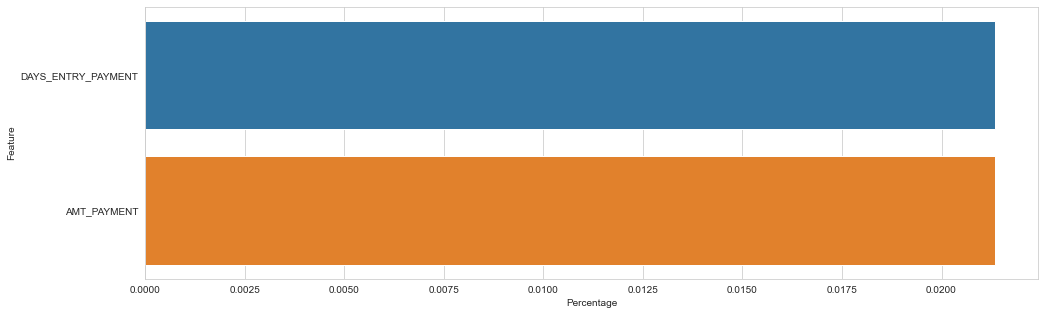

In [83]:
plt.figure(figsize=(16,5))
sns.barplot(x=  null_df["Percentage"] , y= null_df["Feature"] )

In [84]:
df_install[df_install["AMT_PAYMENT"].isnull() == True]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
3764207,1531600,103793,1.0,7,-668.0,NaN,49741.020,NaN
3764208,1947105,159974,1.0,24,-36.0,NaN,22849.515,NaN
3764209,1843773,167270,1.0,22,-20.0,NaN,48092.355,NaN
3764210,1691592,192536,1.0,5,-2561.0,NaN,7675.425,NaN
3764211,1531299,157088,0.0,11,-1847.0,NaN,67.500,NaN
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [85]:
df_install[df_install["DAYS_ENTRY_PAYMENT"].isnull() == True]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
3764207,1531600,103793,1.0,7,-668.0,NaN,49741.020,NaN
3764208,1947105,159974,1.0,24,-36.0,NaN,22849.515,NaN
3764209,1843773,167270,1.0,22,-20.0,NaN,48092.355,NaN
3764210,1691592,192536,1.0,5,-2561.0,NaN,7675.425,NaN
3764211,1531299,157088,0.0,11,-1847.0,NaN,67.500,NaN
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [86]:
df_install[(df_install["SK_ID_PREV"] == 1531600) & (df_install["SK_ID_CURR"] == 103793)]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
802700,1531600,103793,1.0,4,-758.0,-752.0,49741.02,49738.50
1230469,1531600,103793,1.0,1,-848.0,-866.0,49741.02,49741.02
1367795,1531600,103793,1.0,3,-788.0,-785.0,49741.02,49741.02
3118659,1531600,103793,1.0,2,-818.0,-821.0,49741.02,49741.02
3764207,1531600,103793,1.0,7,-668.0,NaN,49741.02,NaN
3764214,1531600,103793,1.0,25,-128.0,NaN,49741.02,NaN
3764224,1531600,103793,1.0,20,-278.0,NaN,49741.02,NaN
3764227,1531600,103793,1.0,21,-248.0,NaN,49741.02,NaN
3764294,1531600,103793,1.0,26,-98.0,NaN,49741.02,NaN
3769072,1531600,103793,1.0,5,-728.0,NaN,49741.02,NaN


#### Fill các dòng null của cột AMT_PAYMENT, DAYS_ENTRY_PAYMENT == 0

In [87]:
df_install.fillna(0, inplace= True)
df_install.isnull().sum()

SK_ID_PREV                0
SK_ID_CURR                0
NUM_INSTALMENT_VERSION    0
NUM_INSTALMENT_NUMBER     0
DAYS_INSTALMENT           0
DAYS_ENTRY_PAYMENT        0
AMT_INSTALMENT            0
AMT_PAYMENT               0
dtype: int64

In [88]:
# tính số ngày muộn
df_install['DPD'] = df_install['DAYS_ENTRY_PAYMENT'] - df_install['DAYS_INSTALMENT']
df_install['DPD'] = df_install['DPD'].apply(lambda x: x if x > 0 else 0)

#tính số ngày sớm
df_install['DBD'] = df_install['DAYS_INSTALMENT'] - df_install['DAYS_ENTRY_PAYMENT']
df_install['DBD'] = df_install['DBD'].apply(lambda x: x if x > 0 else 0)

df_install

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DPD,DBD
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360,0.0,7.0
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525,0.0,0.0
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000,0.0,0.0
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130,0.0,8.0
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585,17.0,0.0
...,...,...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,0.0,67.500,0.000,1624.0,0.0
13605397,1310347,414406,0.0,47,-1539.0,0.0,67.500,0.000,1539.0,0.0
13605398,1308766,402199,0.0,43,-7.0,0.0,43737.435,0.000,7.0,0.0
13605399,1062206,409297,0.0,43,-1986.0,0.0,67.500,0.000,1986.0,0.0


In [89]:
df_by_prev = df_install.groupby(["SK_ID_PREV"])["DAYS_INSTALMENT"].agg(lambda x: x.max() - x.min()).reset_index().rename(columns={'DAYS_INSTALMENT': 'TIME_SPAN'}).set_index('SK_ID_PREV')
df_by_prev

,TIME_SPAN
SK_ID_PREV,
1000001,30.0
1000002,90.0
1000003,60.0
1000004,180.0
1000005,270.0
...,...
2843495,180.0
2843496,422.0
2843497,570.0


In [90]:
## đếm số lần phải trả tiền theo id
previous_ins_count = df_install.groupby('SK_ID_CURR')['SK_ID_PREV'].count().rename( {'SK_ID_PREV': 'INS_COUNT'})
previous_ins_count.head()

SK_ID_CURR
100001     7
100002    19
100003    25
100004     3
100005     9
Name: SK_ID_PREV, dtype: int64

In [91]:
df_install_merged = pd.merge(df_train[['SK_ID_CURR','TARGET']], df_install, how = 'left', on=['SK_ID_CURR'])
df_install_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DPD,DBD
0,100002,1,1038818.0,1.0,16.0,-115.0,-133.0,9251.775,9251.775,0.0,18.0
1,100002,1,1038818.0,1.0,8.0,-355.0,-375.0,9251.775,9251.775,0.0,20.0
2,100002,1,1038818.0,2.0,19.0,-25.0,-49.0,53093.745,53093.745,0.0,24.0
3,100002,1,1038818.0,1.0,12.0,-235.0,-250.0,9251.775,9251.775,0.0,15.0
4,100002,1,1038818.0,1.0,9.0,-325.0,-344.0,9251.775,9251.775,0.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...
11607455,456255,0,1743609.0,1.0,7.0,-780.0,-781.0,11090.835,11090.835,0.0,1.0
11607456,456255,0,2631384.0,3.0,6.0,-606.0,-613.0,27489.690,27489.690,0.0,7.0
11607457,456255,0,1359084.0,1.0,7.0,-245.0,-243.0,11314.170,11314.170,2.0,0.0
11607458,456255,0,2631384.0,3.0,12.0,-426.0,-435.0,27489.690,27489.690,0.0,9.0


In [92]:
df_install_merged = pd.merge(df_install_merged , df_by_prev.reset_index(), how = 'left', on=['SK_ID_PREV'])
df_install_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DPD,DBD,TIME_SPAN
0,100002,1,1038818.0,1.0,16.0,-115.0,-133.0,9251.775,9251.775,0.0,18.0,540.0
1,100002,1,1038818.0,1.0,8.0,-355.0,-375.0,9251.775,9251.775,0.0,20.0,540.0
2,100002,1,1038818.0,2.0,19.0,-25.0,-49.0,53093.745,53093.745,0.0,24.0,540.0
3,100002,1,1038818.0,1.0,12.0,-235.0,-250.0,9251.775,9251.775,0.0,15.0,540.0
4,100002,1,1038818.0,1.0,9.0,-325.0,-344.0,9251.775,9251.775,0.0,19.0,540.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11607455,456255,0,1743609.0,1.0,7.0,-780.0,-781.0,11090.835,11090.835,0.0,1.0,270.0
11607456,456255,0,2631384.0,3.0,6.0,-606.0,-613.0,27489.690,27489.690,0.0,7.0,690.0
11607457,456255,0,1359084.0,1.0,7.0,-245.0,-243.0,11314.170,11314.170,2.0,0.0,210.0
11607458,456255,0,2631384.0,3.0,12.0,-426.0,-435.0,27489.690,27489.690,0.0,9.0,690.0


In [93]:
#add flag to indicate installment received on time and the minimum payment was received
df_install_merged['ON_TIME_FLAG'] = df_install_merged["DPD"].apply(lambda x: 1 if x == 0 else 0)

In [94]:
df_install_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DPD,DBD,TIME_SPAN,ON_TIME_FLAG
0,100002,1,1038818.0,1.0,16.0,-115.0,-133.0,9251.775,9251.775,0.0,18.0,540.0,1
1,100002,1,1038818.0,1.0,8.0,-355.0,-375.0,9251.775,9251.775,0.0,20.0,540.0,1
2,100002,1,1038818.0,2.0,19.0,-25.0,-49.0,53093.745,53093.745,0.0,24.0,540.0,1
3,100002,1,1038818.0,1.0,12.0,-235.0,-250.0,9251.775,9251.775,0.0,15.0,540.0,1
4,100002,1,1038818.0,1.0,9.0,-325.0,-344.0,9251.775,9251.775,0.0,19.0,540.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11607455,456255,0,1743609.0,1.0,7.0,-780.0,-781.0,11090.835,11090.835,0.0,1.0,270.0,1
11607456,456255,0,2631384.0,3.0,6.0,-606.0,-613.0,27489.690,27489.690,0.0,7.0,690.0,1
11607457,456255,0,1359084.0,1.0,7.0,-245.0,-243.0,11314.170,11314.170,2.0,0.0,210.0,0
11607458,456255,0,2631384.0,3.0,12.0,-426.0,-435.0,27489.690,27489.690,0.0,9.0,690.0,1


In [95]:
# số lần trả đúng hạn
df_install_merged['ON_TIME_SUM'] = df_install_merged.groupby(['SK_ID_CURR'])['ON_TIME_FLAG'].transform('sum')
df_install_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DPD,DBD,TIME_SPAN,ON_TIME_FLAG,ON_TIME_SUM
0,100002,1,1038818.0,1.0,16.0,-115.0,-133.0,9251.775,9251.775,0.0,18.0,540.0,1,19
1,100002,1,1038818.0,1.0,8.0,-355.0,-375.0,9251.775,9251.775,0.0,20.0,540.0,1,19
2,100002,1,1038818.0,2.0,19.0,-25.0,-49.0,53093.745,53093.745,0.0,24.0,540.0,1,19
3,100002,1,1038818.0,1.0,12.0,-235.0,-250.0,9251.775,9251.775,0.0,15.0,540.0,1,19
4,100002,1,1038818.0,1.0,9.0,-325.0,-344.0,9251.775,9251.775,0.0,19.0,540.0,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11607455,456255,0,1743609.0,1.0,7.0,-780.0,-781.0,11090.835,11090.835,0.0,1.0,270.0,1,60
11607456,456255,0,2631384.0,3.0,6.0,-606.0,-613.0,27489.690,27489.690,0.0,7.0,690.0,1,60
11607457,456255,0,1359084.0,1.0,7.0,-245.0,-243.0,11314.170,11314.170,2.0,0.0,210.0,0,60
11607458,456255,0,2631384.0,3.0,12.0,-426.0,-435.0,27489.690,27489.690,0.0,9.0,690.0,1,60


In [96]:
## đếm số lần phải trả tiền theo id
df_install_merged['INS_COUNT'] = df_install_merged.groupby(['SK_ID_CURR'])['ON_TIME_FLAG'].transform('count')
df_install_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DPD,DBD,TIME_SPAN,ON_TIME_FLAG,ON_TIME_SUM,INS_COUNT
0,100002,1,1038818.0,1.0,16.0,-115.0,-133.0,9251.775,9251.775,0.0,18.0,540.0,1,19,19
1,100002,1,1038818.0,1.0,8.0,-355.0,-375.0,9251.775,9251.775,0.0,20.0,540.0,1,19,19
2,100002,1,1038818.0,2.0,19.0,-25.0,-49.0,53093.745,53093.745,0.0,24.0,540.0,1,19,19
3,100002,1,1038818.0,1.0,12.0,-235.0,-250.0,9251.775,9251.775,0.0,15.0,540.0,1,19,19
4,100002,1,1038818.0,1.0,9.0,-325.0,-344.0,9251.775,9251.775,0.0,19.0,540.0,1,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11607455,456255,0,1743609.0,1.0,7.0,-780.0,-781.0,11090.835,11090.835,0.0,1.0,270.0,1,60,74
11607456,456255,0,2631384.0,3.0,6.0,-606.0,-613.0,27489.690,27489.690,0.0,7.0,690.0,1,60,74
11607457,456255,0,1359084.0,1.0,7.0,-245.0,-243.0,11314.170,11314.170,2.0,0.0,210.0,0,60,74
11607458,456255,0,2631384.0,3.0,12.0,-426.0,-435.0,27489.690,27489.690,0.0,9.0,690.0,1,60,74


In [97]:
# số khoản vay cũ
df_install_merged["NUM_SUM_INS"] = df_install_merged.groupby(["SK_ID_CURR"])["SK_ID_PREV"].transform("nunique")
df_install_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DPD,DBD,TIME_SPAN,ON_TIME_FLAG,ON_TIME_SUM,INS_COUNT,NUM_SUM_INS
0,100002,1,1038818.0,1.0,16.0,-115.0,-133.0,9251.775,9251.775,0.0,18.0,540.0,1,19,19,1
1,100002,1,1038818.0,1.0,8.0,-355.0,-375.0,9251.775,9251.775,0.0,20.0,540.0,1,19,19,1
2,100002,1,1038818.0,2.0,19.0,-25.0,-49.0,53093.745,53093.745,0.0,24.0,540.0,1,19,19,1
3,100002,1,1038818.0,1.0,12.0,-235.0,-250.0,9251.775,9251.775,0.0,15.0,540.0,1,19,19,1
4,100002,1,1038818.0,1.0,9.0,-325.0,-344.0,9251.775,9251.775,0.0,19.0,540.0,1,19,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11607455,456255,0,1743609.0,1.0,7.0,-780.0,-781.0,11090.835,11090.835,0.0,1.0,270.0,1,60,74,6
11607456,456255,0,2631384.0,3.0,6.0,-606.0,-613.0,27489.690,27489.690,0.0,7.0,690.0,1,60,74,6
11607457,456255,0,1359084.0,1.0,7.0,-245.0,-243.0,11314.170,11314.170,2.0,0.0,210.0,0,60,74,6
11607458,456255,0,2631384.0,3.0,12.0,-426.0,-435.0,27489.690,27489.690,0.0,9.0,690.0,1,60,74,6


In [98]:
# tỉ lệ giữa số tiền phải trả và số tiền thực trả mỗi lần trả
df_install_merged["INSTALMENT_PAYMENT_RATIO"] = df_install_merged["AMT_PAYMENT"] / df_install_merged["AMT_INSTALMENT"]
df_install_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DPD,DBD,TIME_SPAN,ON_TIME_FLAG,ON_TIME_SUM,INS_COUNT,NUM_SUM_INS,INSTALMENT_PAYMENT_RATIO
0,100002,1,1038818.0,1.0,16.0,-115.0,-133.0,9251.775,9251.775,0.0,18.0,540.0,1,19,19,1,1.0
1,100002,1,1038818.0,1.0,8.0,-355.0,-375.0,9251.775,9251.775,0.0,20.0,540.0,1,19,19,1,1.0
2,100002,1,1038818.0,2.0,19.0,-25.0,-49.0,53093.745,53093.745,0.0,24.0,540.0,1,19,19,1,1.0
3,100002,1,1038818.0,1.0,12.0,-235.0,-250.0,9251.775,9251.775,0.0,15.0,540.0,1,19,19,1,1.0
4,100002,1,1038818.0,1.0,9.0,-325.0,-344.0,9251.775,9251.775,0.0,19.0,540.0,1,19,19,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11607455,456255,0,1743609.0,1.0,7.0,-780.0,-781.0,11090.835,11090.835,0.0,1.0,270.0,1,60,74,6,1.0
11607456,456255,0,2631384.0,3.0,6.0,-606.0,-613.0,27489.690,27489.690,0.0,7.0,690.0,1,60,74,6,1.0
11607457,456255,0,1359084.0,1.0,7.0,-245.0,-243.0,11314.170,11314.170,2.0,0.0,210.0,0,60,74,6,1.0
11607458,456255,0,2631384.0,3.0,12.0,-426.0,-435.0,27489.690,27489.690,0.0,9.0,690.0,1,60,74,6,1.0


In [99]:
#tổng số tiền phải trả
df_install_merged["INSTALMENT_SUM"] = df_install_merged.groupby(["SK_ID_CURR"])["AMT_INSTALMENT"].transform("sum")
df_install_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DPD,DBD,TIME_SPAN,ON_TIME_FLAG,ON_TIME_SUM,INS_COUNT,NUM_SUM_INS,INSTALMENT_PAYMENT_RATIO,INSTALMENT_SUM
0,100002,1,1038818.0,1.0,16.0,-115.0,-133.0,9251.775,9251.775,0.0,18.0,540.0,1,19,19,1,1.0,219625.695
1,100002,1,1038818.0,1.0,8.0,-355.0,-375.0,9251.775,9251.775,0.0,20.0,540.0,1,19,19,1,1.0,219625.695
2,100002,1,1038818.0,2.0,19.0,-25.0,-49.0,53093.745,53093.745,0.0,24.0,540.0,1,19,19,1,1.0,219625.695
3,100002,1,1038818.0,1.0,12.0,-235.0,-250.0,9251.775,9251.775,0.0,15.0,540.0,1,19,19,1,1.0,219625.695
4,100002,1,1038818.0,1.0,9.0,-325.0,-344.0,9251.775,9251.775,0.0,19.0,540.0,1,19,19,1,1.0,219625.695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11607455,456255,0,1743609.0,1.0,7.0,-780.0,-781.0,11090.835,11090.835,0.0,1.0,270.0,1,60,74,6,1.0,3068388.810
11607456,456255,0,2631384.0,3.0,6.0,-606.0,-613.0,27489.690,27489.690,0.0,7.0,690.0,1,60,74,6,1.0,3068388.810
11607457,456255,0,1359084.0,1.0,7.0,-245.0,-243.0,11314.170,11314.170,2.0,0.0,210.0,0,60,74,6,1.0,3068388.810
11607458,456255,0,2631384.0,3.0,12.0,-426.0,-435.0,27489.690,27489.690,0.0,9.0,690.0,1,60,74,6,1.0,3068388.810


In [100]:
#tổng số tiền thực trả
df_install_merged["PAYMENT_SUM"] = df_install_merged.groupby(["SK_ID_CURR"])["AMT_PAYMENT"].transform("sum")
df_install_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DPD,DBD,TIME_SPAN,ON_TIME_FLAG,ON_TIME_SUM,INS_COUNT,NUM_SUM_INS,INSTALMENT_PAYMENT_RATIO,INSTALMENT_SUM,PAYMENT_SUM
0,100002,1,1038818.0,1.0,16.0,-115.0,-133.0,9251.775,9251.775,0.0,18.0,540.0,1,19,19,1,1.0,219625.695,219625.695
1,100002,1,1038818.0,1.0,8.0,-355.0,-375.0,9251.775,9251.775,0.0,20.0,540.0,1,19,19,1,1.0,219625.695,219625.695
2,100002,1,1038818.0,2.0,19.0,-25.0,-49.0,53093.745,53093.745,0.0,24.0,540.0,1,19,19,1,1.0,219625.695,219625.695
3,100002,1,1038818.0,1.0,12.0,-235.0,-250.0,9251.775,9251.775,0.0,15.0,540.0,1,19,19,1,1.0,219625.695,219625.695
4,100002,1,1038818.0,1.0,9.0,-325.0,-344.0,9251.775,9251.775,0.0,19.0,540.0,1,19,19,1,1.0,219625.695,219625.695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11607455,456255,0,1743609.0,1.0,7.0,-780.0,-781.0,11090.835,11090.835,0.0,1.0,270.0,1,60,74,6,1.0,3068388.810,3525819.975
11607456,456255,0,2631384.0,3.0,6.0,-606.0,-613.0,27489.690,27489.690,0.0,7.0,690.0,1,60,74,6,1.0,3068388.810,3525819.975
11607457,456255,0,1359084.0,1.0,7.0,-245.0,-243.0,11314.170,11314.170,2.0,0.0,210.0,0,60,74,6,1.0,3068388.810,3525819.975
11607458,456255,0,2631384.0,3.0,12.0,-426.0,-435.0,27489.690,27489.690,0.0,9.0,690.0,1,60,74,6,1.0,3068388.810,3525819.975


In [101]:
df_install_merged_final = df_install_merged.groupby(['SK_ID_CURR']).agg({'ON_TIME_SUM': "first",
                                                                         'INS_COUNT': "first",
                                                                         'INSTALMENT_SUM': "first",
                                                                         'PAYMENT_SUM': "first",
                                                                         "DPD": ["sum", "mean"] ,
                                                                         "TIME_SPAN": ["sum", "mean"]}).reset_index()
df_install_merged_final

SK_ID_CURR ON_TIME_SUM INS_COUNT INSTALMENT_SUM  PAYMENT_SUM   DPD  \
                        first     first          first        first   sum   
0          100002          19        19     219625.695   219625.695   0.0   
1          100003          25        25    1618864.650  1618864.650   0.0   
2          100004           3         3      21288.465    21288.465   0.0   
3          100006          16        16    1007153.415  1007153.415   0.0   
4          100007          50        66     835985.340   806127.975  63.0   
...           ...         ...       ...            ...          ...   ...   
307506     456251           7         7      52450.470    52450.470   0.0   
307507     456252           5         6      60419.205    60419.205   3.0   
307508     456253          13        14      61595.910    57622.815   9.0   
307509     456254          19        19     194556.825   194556.825   0.0   
307510     456255          60        74    3068388.810  3525819.975  52.0   

                 TIME_SPAN              
            mean       sum        mean  
0       0.000000   10260.0  540.000000  
1       0.000000    6120.0  244.800000  
2       0.000000     180.0   60.000000  
3       0.000000    3300.0  206.250000  
4       0.954545   23730.0  359.545455  
...          ...       ...         ...  
307506  0.000000    1260.0  180.000000  
307507  0.500000     900.0  150.000000  
307508  0.642857    1530.0  109.285714  
307509  0.000000    4860.0  255.789474  
307510  0.702703   33180.0  448.378378  

[307511 rows x 9 columns]

In [102]:
df_install_merged_final['ON_TIME_PERCENT'] = df_install_merged_final['ON_TIME_SUM'] / df_install_merged_final['INS_COUNT']
df_install_merged_final

SK_ID_CURR ON_TIME_SUM INS_COUNT INSTALMENT_SUM  PAYMENT_SUM   DPD  \
                        first     first          first        first   sum   
0          100002          19        19     219625.695   219625.695   0.0   
1          100003          25        25    1618864.650  1618864.650   0.0   
2          100004           3         3      21288.465    21288.465   0.0   
3          100006          16        16    1007153.415  1007153.415   0.0   
4          100007          50        66     835985.340   806127.975  63.0   
...           ...         ...       ...            ...          ...   ...   
307506     456251           7         7      52450.470    52450.470   0.0   
307507     456252           5         6      60419.205    60419.205   3.0   
307508     456253          13        14      61595.910    57622.815   9.0   
307509     456254          19        19     194556.825   194556.825   0.0   
307510     456255          60        74    3068388.810  3525819.975  52.0   

                 TIME_SPAN             ON_TIME_PERCENT  
            mean       sum        mean                  
0       0.000000   10260.0  540.000000        1.000000  
1       0.000000    6120.0  244.800000        1.000000  
2       0.000000     180.0   60.000000        1.000000  
3       0.000000    3300.0  206.250000        1.000000  
4       0.954545   23730.0  359.545455        0.757576  
...          ...       ...         ...             ...  
307506  0.000000    1260.0  180.000000        1.000000  
307507  0.500000     900.0  150.000000        0.833333  
307508  0.642857    1530.0  109.285714        0.928571  
307509  0.000000    4860.0  255.789474        1.000000  
307510  0.702703   33180.0  448.378378        0.810811  

[307511 rows x 10 columns]

In [103]:
df_install_merged_final['PAYMENT_RATIO'] = df_install_merged_final['PAYMENT_SUM'] / df_install_merged_final['INSTALMENT_SUM']
df_install_merged_final

SK_ID_CURR ON_TIME_SUM INS_COUNT INSTALMENT_SUM  PAYMENT_SUM   DPD  \
                        first     first          first        first   sum   
0          100002          19        19     219625.695   219625.695   0.0   
1          100003          25        25    1618864.650  1618864.650   0.0   
2          100004           3         3      21288.465    21288.465   0.0   
3          100006          16        16    1007153.415  1007153.415   0.0   
4          100007          50        66     835985.340   806127.975  63.0   
...           ...         ...       ...            ...          ...   ...   
307506     456251           7         7      52450.470    52450.470   0.0   
307507     456252           5         6      60419.205    60419.205   3.0   
307508     456253          13        14      61595.910    57622.815   9.0   
307509     456254          19        19     194556.825   194556.825   0.0   
307510     456255          60        74    3068388.810  3525819.975  52.0   

                 TIME_SPAN             ON_TIME_PERCENT PAYMENT_RATIO  
            mean       sum        mean                                
0       0.000000   10260.0  540.000000        1.000000      1.000000  
1       0.000000    6120.0  244.800000        1.000000      1.000000  
2       0.000000     180.0   60.000000        1.000000      1.000000  
3       0.000000    3300.0  206.250000        1.000000      1.000000  
4       0.954545   23730.0  359.545455        0.757576      0.964285  
...          ...       ...         ...             ...           ...  
307506  0.000000    1260.0  180.000000        1.000000      1.000000  
307507  0.500000     900.0  150.000000        0.833333      1.000000  
307508  0.642857    1530.0  109.285714        0.928571      0.935497  
307509  0.000000    4860.0  255.789474        1.000000      1.000000  
307510  0.702703   33180.0  448.378378        0.810811      1.149079  

[307511 rows x 11 columns]

In [104]:
def payment_cat(x):
    '''Put each id into a category based timely payments rate.'''
    if x >= 0.89:
        return 'Good'
    elif x >= 0.83:
        return 'Par'
    elif x >= 0.71:
        return 'Sub_Par'
    elif x >= 0.53:
        return 'Poor'
    else:
        return 'Very_Poor'


In [105]:
df_install_merged_final['INS_ON_TIME_GRADE'] = df_install_merged_final['ON_TIME_PERCENT'].apply(payment_cat)
df_install_merged_final

SK_ID_CURR ON_TIME_SUM INS_COUNT INSTALMENT_SUM  PAYMENT_SUM   DPD  \
                        first     first          first        first   sum   
0          100002          19        19     219625.695   219625.695   0.0   
1          100003          25        25    1618864.650  1618864.650   0.0   
2          100004           3         3      21288.465    21288.465   0.0   
3          100006          16        16    1007153.415  1007153.415   0.0   
4          100007          50        66     835985.340   806127.975  63.0   
...           ...         ...       ...            ...          ...   ...   
307506     456251           7         7      52450.470    52450.470   0.0   
307507     456252           5         6      60419.205    60419.205   3.0   
307508     456253          13        14      61595.910    57622.815   9.0   
307509     456254          19        19     194556.825   194556.825   0.0   
307510     456255          60        74    3068388.810  3525819.975  52.0   

                 TIME_SPAN             ON_TIME_PERCENT PAYMENT_RATIO  \
            mean       sum        mean                                 
0       0.000000   10260.0  540.000000        1.000000      1.000000   
1       0.000000    6120.0  244.800000        1.000000      1.000000   
2       0.000000     180.0   60.000000        1.000000      1.000000   
3       0.000000    3300.0  206.250000        1.000000      1.000000   
4       0.954545   23730.0  359.545455        0.757576      0.964285   
...          ...       ...         ...             ...           ...   
307506  0.000000    1260.0  180.000000        1.000000      1.000000   
307507  0.500000     900.0  150.000000        0.833333      1.000000   
307508  0.642857    1530.0  109.285714        0.928571      0.935497   
307509  0.000000    4860.0  255.789474        1.000000      1.000000   
307510  0.702703   33180.0  448.378378        0.810811      1.149079   

       INS_ON_TIME_GRADE  
                          
0                   Good  
1                   Good  
2                   Good  
3                   Good  
4                Sub_Par  
...                  ...  
307506              Good  
307507               Par  
307508              Good  
307509              Good  
307510           Sub_Par  

[307511 rows x 12 columns]

In [106]:
df_install_merged_final['PAYMENT_GRADE'] = df_install_merged_final['PAYMENT_RATIO'].apply(payment_cat)
df_install_merged_final

SK_ID_CURR ON_TIME_SUM INS_COUNT INSTALMENT_SUM  PAYMENT_SUM   DPD  \
                        first     first          first        first   sum   
0          100002          19        19     219625.695   219625.695   0.0   
1          100003          25        25    1618864.650  1618864.650   0.0   
2          100004           3         3      21288.465    21288.465   0.0   
3          100006          16        16    1007153.415  1007153.415   0.0   
4          100007          50        66     835985.340   806127.975  63.0   
...           ...         ...       ...            ...          ...   ...   
307506     456251           7         7      52450.470    52450.470   0.0   
307507     456252           5         6      60419.205    60419.205   3.0   
307508     456253          13        14      61595.910    57622.815   9.0   
307509     456254          19        19     194556.825   194556.825   0.0   
307510     456255          60        74    3068388.810  3525819.975  52.0   

                 TIME_SPAN             ON_TIME_PERCENT PAYMENT_RATIO  \
            mean       sum        mean                                 
0       0.000000   10260.0  540.000000        1.000000      1.000000   
1       0.000000    6120.0  244.800000        1.000000      1.000000   
2       0.000000     180.0   60.000000        1.000000      1.000000   
3       0.000000    3300.0  206.250000        1.000000      1.000000   
4       0.954545   23730.0  359.545455        0.757576      0.964285   
...          ...       ...         ...             ...           ...   
307506  0.000000    1260.0  180.000000        1.000000      1.000000   
307507  0.500000     900.0  150.000000        0.833333      1.000000   
307508  0.642857    1530.0  109.285714        0.928571      0.935497   
307509  0.000000    4860.0  255.789474        1.000000      1.000000   
307510  0.702703   33180.0  448.378378        0.810811      1.149079   

       INS_ON_TIME_GRADE PAYMENT_GRADE  
                                        
0                   Good          Good  
1                   Good          Good  
2                   Good          Good  
3                   Good          Good  
4                Sub_Par          Good  
...                  ...           ...  
307506              Good          Good  
307507               Par          Good  
307508              Good          Good  
307509              Good          Good  
307510           Sub_Par          Good  

[307511 rows x 13 columns]

In [107]:
df_install_merged_final.columns

MultiIndex([(       'SK_ID_CURR',      ''),
            (      'ON_TIME_SUM', 'first'),
            (        'INS_COUNT', 'first'),
            (   'INSTALMENT_SUM', 'first'),
            (      'PAYMENT_SUM', 'first'),
            (              'DPD',   'sum'),
            (              'DPD',  'mean'),
            (        'TIME_SPAN',   'sum'),
            (        'TIME_SPAN',  'mean'),
            (  'ON_TIME_PERCENT',      ''),
            (    'PAYMENT_RATIO',      ''),
            ('INS_ON_TIME_GRADE',      ''),
            (    'PAYMENT_GRADE',      '')],
           )

In [108]:
df_install_merged_final.columns = ["INS_BAL_" + c[0] + "_" + c[1].upper() for c in df_install_merged_final.columns.values.tolist()]
df_install_merged_final

,INS_BAL_SK_ID_CURR_,INS_BAL_ON_TIME_SUM_FIRST,INS_BAL_INS_COUNT_FIRST,INS_BAL_INSTALMENT_SUM_FIRST,INS_BAL_PAYMENT_SUM_FIRST,INS_BAL_DPD_SUM,INS_BAL_DPD_MEAN,INS_BAL_TIME_SPAN_SUM,INS_BAL_TIME_SPAN_MEAN,INS_BAL_ON_TIME_PERCENT_,INS_BAL_PAYMENT_RATIO_,INS_BAL_INS_ON_TIME_GRADE_,INS_BAL_PAYMENT_GRADE_
0,100002,19,19,219625.695,219625.695,0.0,0.000000,10260.0,540.000000,1.000000,1.000000,Good,Good
1,100003,25,25,1618864.650,1618864.650,0.0,0.000000,6120.0,244.800000,1.000000,1.000000,Good,Good
2,100004,3,3,21288.465,21288.465,0.0,0.000000,180.0,60.000000,1.000000,1.000000,Good,Good
3,100006,16,16,1007153.415,1007153.415,0.0,0.000000,3300.0,206.250000,1.000000,1.000000,Good,Good
4,100007,50,66,835985.340,806127.975,63.0,0.954545,23730.0,359.545455,0.757576,0.964285,Sub_Par,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,7,7,52450.470,52450.470,0.0,0.000000,1260.0,180.000000,1.000000,1.000000,Good,Good
307507,456252,5,6,60419.205,60419.205,3.0,0.500000,900.0,150.000000,0.833333,1.000000,Par,Good
307508,456253,13,14,61595.910,57622.815,9.0,0.642857,1530.0,109.285714,0.928571,0.935497,Good,Good
307509,456254,19,19,194556.825,194556.825,0.0,0.000000,4860.0,255.789474,1.000000,1.000000,Good,Good


In [112]:
df_install_merged_final.rename(columns = {"INS_BAL_SK_ID_CURR_": "SK_ID_CURR"}, inplace = True)
df_install_merged_final.columns

Index(['SK_ID_CURR', 'INS_BAL_ON_TIME_SUM_FIRST', 'INS_BAL_INS_COUNT_FIRST',
       'INS_BAL_INSTALMENT_SUM_FIRST', 'INS_BAL_PAYMENT_SUM_FIRST',
       'INS_BAL_DPD_SUM', 'INS_BAL_DPD_MEAN', 'INS_BAL_TIME_SPAN_SUM',
       'INS_BAL_TIME_SPAN_MEAN', 'INS_BAL_ON_TIME_PERCENT_',
       'INS_BAL_PAYMENT_RATIO_', 'INS_BAL_INS_ON_TIME_GRADE_',
       'INS_BAL_PAYMENT_GRADE_'],
      dtype='object')

In [113]:
df_install_merged_final.to_csv("data_preprocessed/06_instalment_payment.csv",index=False)